# 문제정의
- 비만을 판단하는 모델을 만들기
- 분류문제로 접근

# 데이터 수집
- csv파일로 데이터 수집
- 500명에 대한 키, 몸무게, 성별, 비만도 데이터

In [5]:
import pandas as pd
bmi=pd.read_csv('./data/bmi_500.csv')
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# 데이터 전처리
- 결측치 확인
- 이상치 확인

## 결측치 확인
- info()

In [6]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


## 이상치 확인
- describe()
- 수치형 데이터에서만 확인 가능

In [7]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 탐색적 데이터 분석
- 시각화를 통해서 원하는 정보를 한눈에 알아보기
- 비만도별로 데이터가 잘 나누어져있는지 확인

## 비만도 등급확인

In [8]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

##  Weak인 사람들을 그래프로 확인해보기

In [9]:
scatter_data=bmi[bmi['Label']=='Weak']

In [10]:
import matplotlib.pyplot as plt

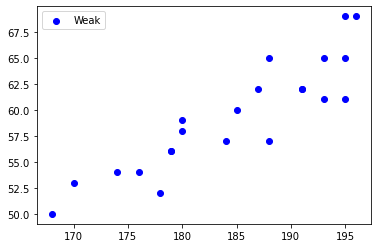

In [11]:
plt.scatter(scatter_data['Height'], scatter_data['Weight'], 
            color='blue', label='Weak')
plt.legend()
plt.show()

## Overweight 그래프 그리기

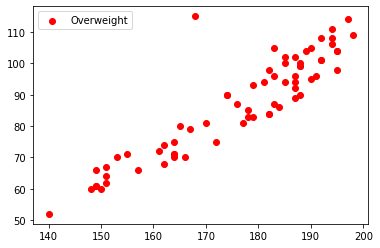

In [12]:
scatter_data=bmi[bmi['Label']=='Overweight']
plt.scatter(scatter_data['Height'], scatter_data['Weight'], 
            color='red', label='Overweight')
plt.legend()
plt.show()

## 전체 그래프 그리기

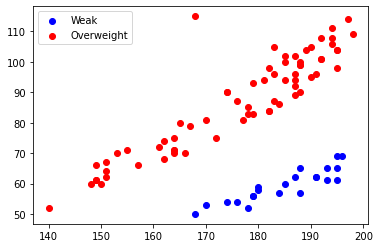

In [13]:
scatter_data = bmi[ bmi['Label'] == 'Weak' ]
plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , color = 'blue',
           label = 'Weak')
plt.legend()

scatter_data = bmi[ bmi['Label'] == 'Overweight' ]
plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , color = 'red',
           label = 'Overweight')
plt.legend()
plt.show()

### 반복되는 부분 함수로 만들기

In [14]:
 def myScatter(label, color):
    scatter_data = bmi[ bmi['Label'] == label ]
    plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , 
                color = color, label = label)
    plt.legend()

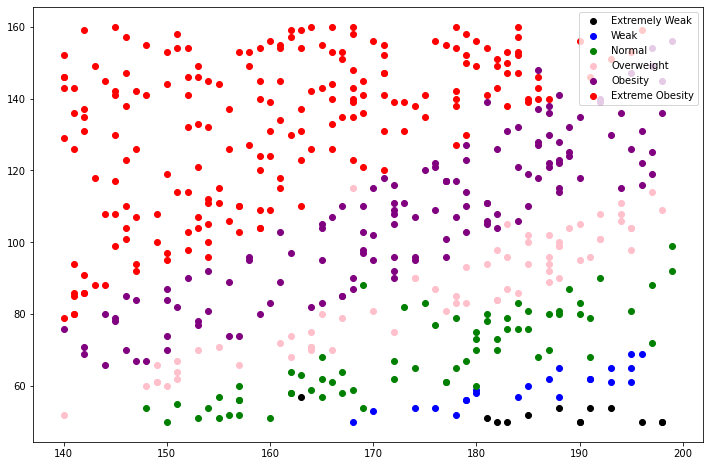

In [20]:
plt.figure(figsize=(12,8))
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')
plt.show()

## 이상치 확인하기

In [19]:
# 키 : 153cm
# 몸무게 : 78kg
bmi[bmi['Weight']==78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Obesity
234,Male,145,78,Obesity


## 이상치 값 변경

In [18]:
bmi.iloc[231,3]='Obesity'

# 모델 선택 및 하이퍼 파라미터 튜닝
- 데이터를 문제와 답으로 분리
- 훈련셋과 평가셋으로 분리
- 모델 생성/하이퍼 파라미터 튜닝

In [21]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


## 문제와 정답으로 분리

In [22]:
X= bmi.loc[:, 'Height':'Weight']
y= bmi.loc[:, 'Label']

In [23]:
X.shape, y.shape

((500, 2), (500,))

## 훈련과 평가로 분리
- 훈련7: 평가3

In [25]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

## 모델 불러오기
- KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

# 학습
- 훈련용 데이터를 통해서 학습

In [28]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# 평가
- 예측
- 모델 평가

In [29]:
knn_model.predict([[174,68]])

array(['Normal'], dtype=object)

In [30]:
knn_model.score(X_test, y_test)

0.9066666666666666

In [31]:
knn_model.score(X_train, y_train)

0.9285714285714286

# 성별 컬럼을 추가해 학습하기
- Male -> 1
- Female -> 2
- map

In [34]:
bmi['Gender']=bmi['Gender'].map({"Male":1, "Female":2})
bmi.head()

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,2,185,110,Obesity
3,2,195,104,Overweight
4,1,149,61,Overweight


## 문제와 정답으로 분리

In [35]:
X = bmi.iloc[:,:-1]
y = bmi.iloc[:,-1]

## 훈련과 평가로 분리

In [36]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

## 모델 불러오기

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

## 학습

In [38]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 평가

In [42]:
# 성별컬럼을 추가해서 학습을 했지만 결과가 전과 동일함
# 성별이 비만도를 예측하는데 있어서 영향을 끼치지 못함

In [39]:
knn_model.score(X_test, y_test)

0.9066666666666666

In [40]:
knn_model.score(X_train, y_train)

0.9285714285714286